In [1]:
import pandas as pd
import numpy as np

tmdb = pd.read_csv('train.csv')

tmdb

id                              belongs_to_collection    budget  \
0        1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1        2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2        3                                                NaN   3300000   
3        4                                                NaN   1200000   
4        5                                                NaN         0   
...    ...                                                ...       ...   
2995  2996                                                NaN         0   
2996  2997                                                NaN         0   
2997  2998                                                NaN  65000000   
2998  2999                                                NaN  42000000   
2999  3000                                                NaN  35000000   

                                                 genres  \
0                        [{'id': 35, 'name': 'Comedy'}]   
1     [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                         [{'id': 18, 'name': 'Drama'}]   
3     [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4     [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
...                                                 ...   
2995  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
2996  [{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...   
2997  [{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...   
2998  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
2999  [{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...   

                               homepage    imdb_id original_language  \
0                                   NaN  tt2637294                en   
1                                   NaN  tt0368933                en   
2     http://sonyclassics.com/whiplash/  tt2582802                en   
3            http://kahaanithefilm.com/  tt1821480                hi   
4                                   NaN  tt1380152                ko   
...                                 ...        ...               ...   
2995                                NaN  tt0109403                en   
2996                                NaN  tt2364975                sv   
2997                                NaN  tt0116908                en   
2998     http://www.alongcamepolly.com/  tt0343135                en   
2999   http://www.abductionthefilm.com/  tt1600195                en   

                                original_title  \
0                       Hot Tub Time Machine 2   
1     The Princess Diaries 2: Royal Engagement   
2                                     Whiplash   
3                                      Kahaani   
4                                         마린보이   
...                                        ...   
2995                                   Chasers   
2996                               Vi är bäst!   
2997                   The Long Kiss Goodnight   
2998                          Along Came Polly   
2999                                 Abduction   

                                               overview  popularity  ...  \
0     When Lou, who has become the "father of the In...    6.575393  ...   
1     Mia Thermopolis is now a college graduate and ...    8.248895  ...   
2     Under the direction of a ruthless instructor, ...   64.299990  ...   
3     Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936  ...   
4     Marine Boy is the story of a former national s...    1.148070  ...   
...                                                 ...         ...  ...   
2995  Military men Rock Reilly and Eddie Devane are ...    9.853270  ...   
2996  Three girls in 1980s Stockholm decide to form ...    3.727996  ...   
2997  Samantha Caine, suburban homemaker, is the ide...   14.482345  ...   
2998  Reuben Feffer is a guy who's spent his entire ...   15.725542  ...   
2999  A young man sets out to uncover the truth abou...   10.512109  ...   

     release_date r

In [2]:
tmdb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [3]:
tmdb.describe()

id        budget   popularity      runtime       revenue
count  3000.000000  3.000000e+03  3000.000000  2998.000000  3.000000e+03
mean   1500.500000  2.253133e+07     8.463274   107.856571  6.672585e+07
std     866.169729  3.702609e+07    12.104000    22.086434  1.375323e+08
min       1.000000  0.000000e+00     0.000001     0.000000  1.000000e+00
25%     750.750000  0.000000e+00     4.018053    94.000000  2.379808e+06
50%    1500.500000  8.000000e+06     7.374861   104.000000  1.680707e+07
75%    2250.250000  2.900000e+07    10.890983   118.000000  6.891920e+07
max    3000.000000  3.800000e+08   294.337037   338.000000  1.519558e+09

In [4]:
tmdb.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [5]:
numerical_cols = [cname for cname in tmdb.columns if tmdb[cname].dtype in ['int64', 'float64']]

numerical_cols.remove('id')


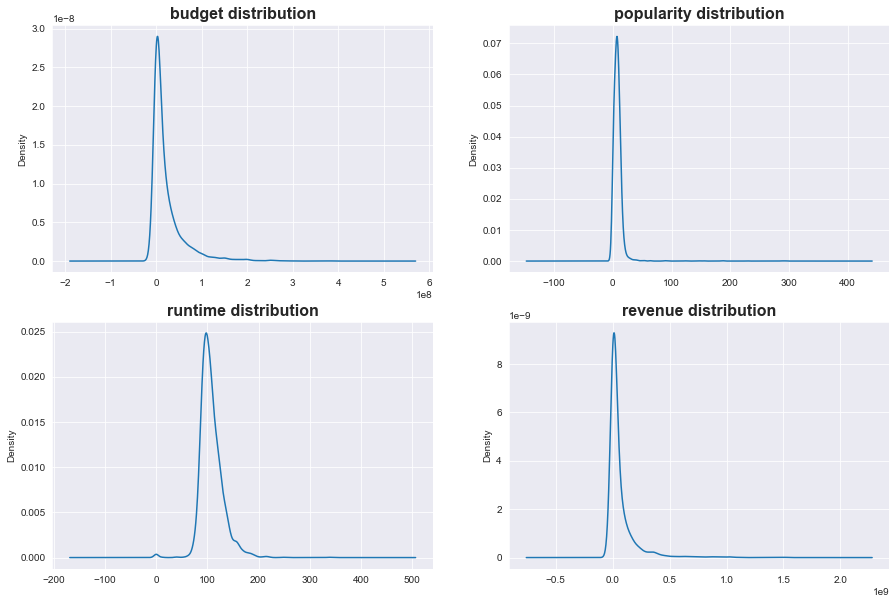

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#stylizing grid
sns.set_style("darkgrid")
fig, axes = plt.subplots(nrows=2, ncols=2)

fig.set_figheight(10)
fig.set_figwidth(15)


i=0
for row in axes:
    for col in row:
        tmdb[numerical_cols[i]].plot(kind='kde', ax=col)
        col.set_title(numerical_cols[i] + ' distribution', fontsize=16, fontweight='bold')
        i +=1

These don't tell us much, but we can at least get an idea of where most of the data will fall for each of these variables. 

A cool idea I saw from another notebook is creating an "is sequel" column from the "belongs_to_collection" column. Let's do so here -- I think it might be interesting to see this feature in the scatterplots since so many popular movies (like those in the MCU) are sequels nowadays

In [7]:
tmdb['is_sequel'] = tmdb['belongs_to_collection'].apply(lambda x: 0 if pd.isna(x) else 1).astype('int64')

In [8]:
tmdb.head()



id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2   3                                                NaN   3300000   
3   4                                                NaN   1200000   
4   5                                                NaN         0   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                            homepage    imdb_id original_language  \
0                                NaN  tt2637294                en   
1                                NaN  tt0368933                en   
2  http://sonyclassics.com/whiplash/  tt2582802                en   
3         http://kahaanithefilm.com/  tt1821480                hi   
4                                NaN  tt1380152                ko   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                      마린보이   

                                            overview  popularity  ... runtime  \
0  When Lou, who has become the "father of the In...    6.575393  ...    93.0   
1  Mia Thermopolis is now a college graduate and ...    8.248895  ...   113.0   
2  Under the direction of a ruthless instructor, ...   64.299990  ...   105.0   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936  ...   122.0   
4  Marine Boy is the story of a former national s...    1.148070  ...   118.0   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
4           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]  Released   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   
2    The road to greatness can take you to the edge.   
3                                                NaN   
4                                                NaN   

                                      title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                Marine Boy   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
2  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
3  [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   
4                                                NaN   

                                                cast  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
2  [{'cast_id': 5, 'character': 'Andrew Neimann',...   
3  [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   
4  [{'cast_id': 3, 'character': 'Chun-soo', 'cred...   

                                                crew   revenue is_sequel  
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651         1  
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435         1  
2  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000         0  
3  [{'credit_id': '52fe48779251416c9108d6eb', 'de...  16000000       

Text(0.5, 1.0, 'Budget vs Revenue Scatterplot')

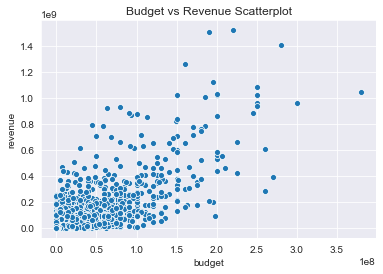

In [9]:
sns.scatterplot(x='budget', y='revenue', data=tmdb)
plt.title('Budget vs Revenue Scatterplot')

Text(0.5, 1.0, 'Budget vs Revenue Scatterplot with Sequels')

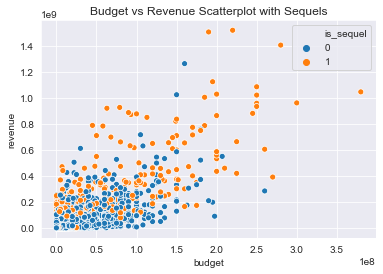

In [10]:
sns.scatterplot(x='budget', y='revenue', hue='is_sequel', data=tmdb)
plt.title('Budget vs Revenue Scatterplot with Sequels')

Text(0.5, 1.0, 'Popularity vs Revenue Scatterplot')

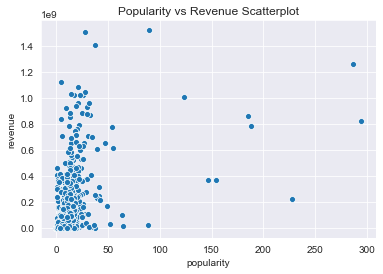

In [11]:
sns.scatterplot(x='popularity', y='revenue', data=tmdb)
plt.title('Popularity vs Revenue Scatterplot')

Text(0.5, 1.0, 'Runtime vs Revenue Scatterplot')

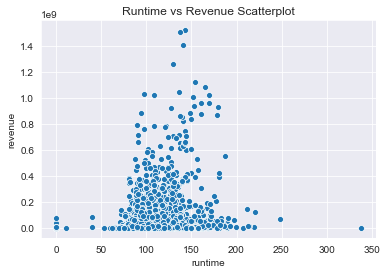

In [12]:
sns.scatterplot(x='runtime', y='revenue', data=tmdb)
plt.title('Runtime vs Revenue Scatterplot')

Clearly there is a positive correlation between budget and revenue

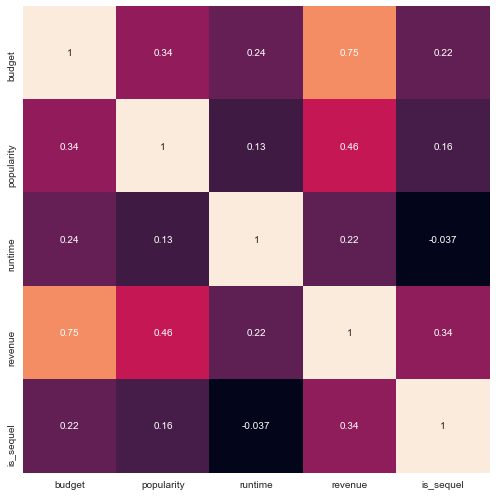

In [13]:
plt.figure(figsize=(12, 7))
corr_matrix = tmdb.corr()

corr_matrix = corr_matrix.drop('id')
del corr_matrix['id']




sns.heatmap(corr_matrix, mask = np.zeros_like(corr_matrix, dtype=np.bool), square = True, annot=True, cbar=False )
plt.tight_layout()

Now let's do something about those columns with the JSON values. 



In [14]:
#make a list of all the columns in JSON format

json_col = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']


In [15]:
#transform them into dict using ast

import ast

for col in json_col:
    tmdb[col] = tmdb[col].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

Now that we can easily access the data in the JSON columns, let's do some more data exploration. First, let's take a look at the most popular genres in this dataset. 

In [16]:
#make a list of all the genres
list_of_genres = list(tmdb['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

(-0.5, 1199.5, 999.5, -0.5)

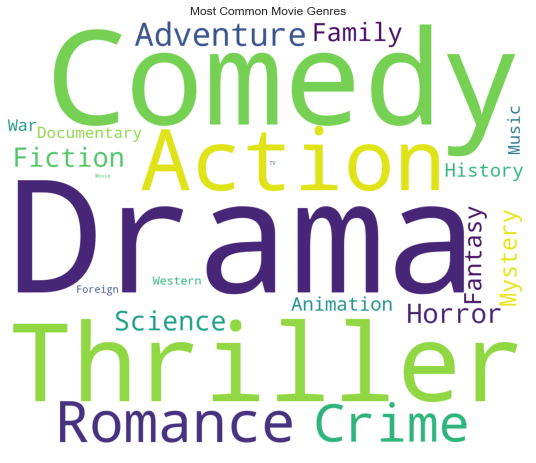

In [17]:
#A wordcloud would allow us to easily identify the most popular genres

from wordcloud import WordCloud

plt.figure(figsize = (12, 8))
text = ' '.join([i for j in list_of_genres for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Most Common Movie Genres')
plt.axis("off")

Cool! NLP is a little outside of my skillset, but it is interesting to see the most common genres this way -- let's make more using other columns such as keywords or title.

In [18]:
# make list of keywords

list_of_keywords = list(tmdb['Keywords'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

(-0.5, 1199.5, 999.5, -0.5)

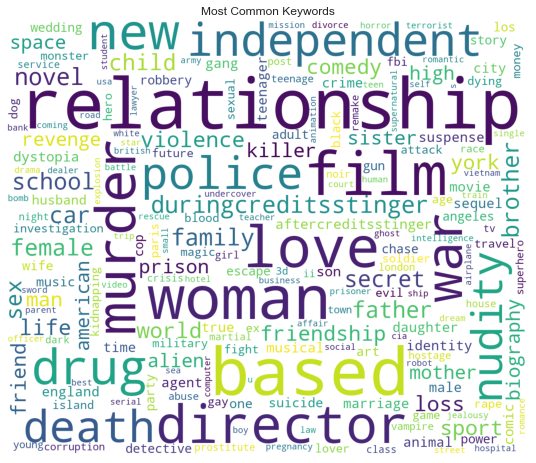

In [19]:
plt.figure(figsize = (12, 8))
text = ' '.join([i for j in list_of_keywords for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Most Common Keywords')
plt.axis("off")

(-0.5, 1199.5, 999.5, -0.5)

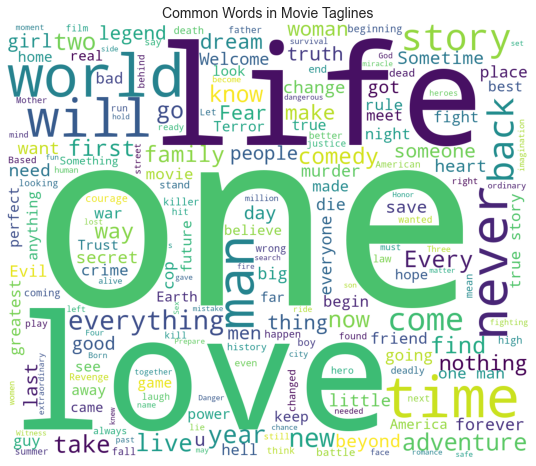

In [20]:
plt.figure(figsize = (12, 8))
text = ' '.join(tmdb['tagline'].apply(lambda x:x if x is not np.nan else ''))
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Common Words in Movie Taglines', fontsize=14)
plt.axis("off")


(-0.5, 1199.5, 999.5, -0.5)

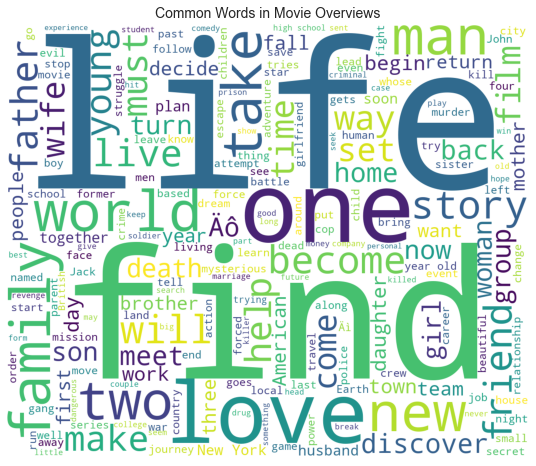

In [21]:
plt.figure(figsize = (12, 8))
text = ' '.join(tmdb['overview'].apply(lambda x:x if x is not np.nan else ''))
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Common Words in Movie Overviews', fontsize=14)
plt.axis("off")

Let's go ahead and just extract the 'name' from each json object in the data -- this will make it easier to preprocess our data in a pipeline

In [22]:



for col in json_col:
    tmdb[col] = tmdb[col].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')




In [23]:
tmdb.head()

id            belongs_to_collection    budget                       genres  \
0   1  Hot Tub Time Machine Collection  14000000                       Comedy   
1   2  The Princess Diaries Collection  40000000  Comedy Drama Family Romance   
2   3                                    3300000                        Drama   
3   4                                    1200000               Drama Thriller   
4   5                                          0              Action Thriller   

                            homepage    imdb_id original_language  \
0                                NaN  tt2637294                en   
1                                NaN  tt0368933                en   
2  http://sonyclassics.com/whiplash/  tt2582802                en   
3         http://kahaanithefilm.com/  tt1821480                hi   
4                                NaN  tt1380152                ko   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                      마린보이   

                                            overview  popularity  ... runtime  \
0  When Lou, who has become the "father of the In...    6.575393  ...    93.0   
1  Mia Thermopolis is now a college graduate and ...    8.248895  ...   113.0   
2  Under the direction of a ruthless instructor, ...   64.299990  ...   105.0   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936  ...   122.0   
4  Marine Boy is the story of a former national s...    1.148070  ...   118.0   

  spoken_languages    status  \
0          English  Released   
1          English  Released   
2          English  Released   
3   English हिन्दी  Released   
4          한국어/조선말  Released   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   
2    The road to greatness can take you to the edge.   
3                                                NaN   
4                                                NaN   

                                      title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                Marine Boy   

                                            Keywords  \
0    duringcreditsstinger hot tub sequel time travel   
1           coronation duty falling in love marriage   
2  conservatory drummer jazz jazz band montage mu...   
3  bollywood crime india missing husband mystery ...   
4                                                      

                                                cast  \
0  Adam Herschman Adam Scott Bianca Haase Bruce B...   
1  Abigail Breslin Anne Hathaway Callum Blue Caro...   
2  Adrian Burks Amanda Newman April Grace Austin ...   
3  Darshan Jariwala Indraneil Sengupta Masood Akh...   
4  Jo Jae-hyeon Kim Joon-bae Kim Kang-woo Park Si...   

                                                crew   revenue is_sequel  
0  Adam Blum Allison Gordin Andrew Panay Annabell...  12314651         1  
1  Bruce Green Charles Minsky Debra Martin Chase ...  95149435         1  
2  Alicia Hadaway Andy Ross Barbara Harris Ben Wi...  13092000         0  
3                Sujoy Ghosh Sujoy Ghosh Sujoy Ghosh  16000000         0  
4                      Jong-seok Yoon Jong-seok Yoon   3923970         0  

[5 rows x 24 columns]

## Split Data

In [24]:
from sklearn.model_selection import train_test_split

X = tmdb.drop(['revenue'], axis=1)
y = np.log1p(tmdb['revenue'])

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)



# Pipeline

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PowerTransformer

#dropping columns likely to add noise 
drop_cols = ['id', 'belongs_to_collection', 'homepage', 'imdb_id', 'original_title', 'spoken_languages', 'overview', 'poster_path', 'tagline', 'title', 'crew']

numerical_cols = [cname for cname in X_train.columns if 
                X_train[cname].dtype in ['int64', 'float64']]

categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                        X_train[cname].dtype == "object"]

numerical_transformer = Pipeline([('imputer', SimpleImputer(strategy='median')),
                        ('scaler', PowerTransformer())])

categorical_transformer = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                         ('cat_enc', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('drop_cols', 'drop', drop_cols),
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),

    ]
)




# Model building

In [27]:
#linear regression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score


model = LinearRegression()

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('scaler', MinMaxScaler()),
                                ('model', model)])

my_pipeline.fit(X_train, y_train)

lin_preds = my_pipeline.predict(X_val)

mse = mean_squared_error(y_val, lin_preds)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_val, lin_preds)
print('R2 Score',r2)

MSE: 4.209504011616847
RMSE: 2.0517075843347774
R2 Score 0.4744764033998181


In [28]:
#rf regression
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1)

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('scaler', MinMaxScaler()),
                                ('model', model)])

my_pipeline.fit(X_train, y_train)

rf_preds = my_pipeline.predict(X_val)

mse = mean_squared_error(y_val, rf_preds)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_val, rf_preds)
print('R2 Score',r2)

MSE: 4.529593235569857
RMSE: 2.1282841059336643
R2 Score 0.43451577152002174


## Random Search

Hyperparameter tuning with RandomizedSearchCV

In [29]:
from sklearn.model_selection import RandomizedSearchCV
#first create random grid to sample from

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] 
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [30]:
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [31]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=1, n_jobs=-1)

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('scaler', MinMaxScaler()),
                                ('model', rf_random)])

my_pipeline.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.3min finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('drop_cols', 'drop',
                                                  ['id',
                                                   'belongs_to_collection',
                                                   'homepage', 'imdb_id',
                                                   'original_title',
                                                   'spoken_languages',
                                                   'overview', 'poster_path',
                                                   'tagline', 'title',
                                                   'crew']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                         

In [32]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [33]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=200)

In [34]:
best_random = rf_random.best_estimator_

best_random_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('scaler', MinMaxScaler()),
                                ('model', best_random)])

best_random_pipeline.fit(X_train, y_train)

random_rf_pred = best_random_pipeline.predict(X_val)

mse = mean_squared_error(y_val, random_rf_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_val, random_rf_pred)
print('R2 Score',r2)

MSE: 4.058769620107755
RMSE: 2.0146388311823427
R2 Score 0.4932944112550409


Using Random Search to tune the random forest has shown a pretty good improvement, now outperforming linear regression and random forest with base parameters. 

## Grid Search

Let's see if we can improve even more using Grid Search. We can use what we learned from the best parameters of the Random Search to narrow down the range for each parameter

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap' : [True],
    'n_estimators' : [100, 200, 300, 1000],
    'min_samples_split' : [2, 4, 6],
    'min_samples_leaf' : [2, 3, 4],
    'max_features' : ['sqrt'],
    'max_depth' : [60, 70, 80, 90]}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)


grid_search_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('scaler', MinMaxScaler()),
                                ('model', grid_search)])


grid_search_pipeline.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  3.5min finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('drop_cols', 'drop',
                                                  ['id',
                                                   'belongs_to_collection',
                                                   'homepage', 'imdb_id',
                                                   'original_title',
                                                   'spoken_languages',
                                                   'overview', 'poster_path',
                                                   'tagline', 'title',
                                                   'crew']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                         

In [37]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 300}

In [38]:
best_grid = grid_search.best_estimator_

best_grid_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('scaler', MinMaxScaler()),
                                ('model', best_grid)])


best_grid_pipeline.fit(X_train, y_train)

best_grid_preds = best_grid_pipeline.predict(X_val)

mse = mean_squared_error(y_val, best_grid_preds)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_val, best_grid_preds)
print('R2 Score',r2)

MSE: 4.0440655306973525
RMSE: 2.010986208480146
R2 Score 0.49513010161912197


Awesome! Looks like we were able to improve even further from the Random Search.

In [58]:
tmdb_test = pd.read_csv('test.csv')

tmdb_test.head()

id                              belongs_to_collection   budget  \
0  3001  [{'id': 34055, 'name': 'Pokémon Collection', '...        0   
1  3002                                                NaN    88000   
2  3003                                                NaN        0   
3  3004                                                NaN  6800000   
4  3005                                                NaN  2000000   

                                              genres  \
0  [{'id': 12, 'name': 'Adventure'}, {'id': 16, '...   
1  [{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...   
2  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
3  [{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...   
4  [{'id': 36, 'name': 'History'}, {'id': 99, 'na...   

                                            homepage    imdb_id  \
0  http://www.pokemon.com/us/movies/movie-pokemon...  tt1226251   
1                                                NaN  tt0051380   
2                                                NaN  tt0118556   
3             http://www.sonyclassics.com/incendies/  tt1255953   
4                                                NaN  tt0418753   

  original_language               original_title  \
0                ja           ディアルガVSパルキアVSダークライ   
1                en  Attack of the 50 Foot Woman   
2                en             Addicted to Love   
3                fr                    Incendies   
4                en           Inside Deep Throat   

                                            overview  popularity  ...  \
0  Ash and friends (this time accompanied by newc...    3.851534  ...   
1  When an abused wife grows to giant size becaus...    3.559789  ...   
2  Good-natured astronomer Sam is devastated when...    8.085194  ...   
3  A mother's last wishes send twins Jeanne and S...    8.596012  ...   
4  In 1972, a seemingly typical shoestring budget...    3.217680  ...   

                                production_countries release_date runtime  \
0  [{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...      7/14/07    90.0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...      5/19/58    65.0   
2  [{'iso_3166_1': 'US', 'name': 'United States o...      5/23/97   100.0   
3  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...       9/4/10   130.0   
4  [{'iso_3166_1': 'US', 'name': 'United States o...      2/11/05    92.0   

                                    spoken_languages    status  \
0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
1           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3  [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...  Released   
4           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0  Somewhere Between Time & Space... A Legend Is ...   
1  A titanic beauty spreads a macabre wave of hor...   
2          A Comedy About Lost Loves And Last Laughs   
3  The search began at the opening of their mothe...   
4  It was filmed in 6 days for 25 thousand dollar...   

                          title  \
0  Pokémon: The Rise of Darkrai   
1   Attack of the 50 Foot Woman   
2              Addicted to Love   
3                     Incendies   
4            Inside Deep Throat   

                                            Keywords  \
0  [{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...   
1  [{'id': 9748, 'name': 'revenge'}, {'id': 9951,...   
2  [{'id': 931, 'name': 'jealousy'}, {'id': 9673,...   
3  [{'id': 378, 'name': 'prison'}, {'id': 539, 'n...   
4  [{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...   

                                                cast  \
0  [{'cast_id': 3, 'character': 'Tonio', 'credit_...   
1  [{'cast_id': 2, 'character': 'Nancy Fowler Arc...   
2  [{'cast_id': 11, 'character': 'Maggie', 'credi...   
3  [{'cast_id': 6, 'character': 'Nawal', 'credit_...   
4  [{'cast_id': 1, 'character': 'Narrator (voice)...   

    

In [61]:
#process the json cols 

for col in json_col:
    tmdb_test[col] = tmdb_test[col].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

for col in json_col:
    tmdb_test[col] = tmdb_test[col].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')

tmdb_test.head()

id belongs_to_collection   budget                              genres  \
0  3001    Pokémon Collection        0  Adventure Animation Family Fantasy   
1  3002                          88000              Horror Science Fiction   
2  3003                              0                      Comedy Romance   
3  3004                        6800000                   Drama Mystery War   
4  3005                        2000000                 Documentary History   

                                            homepage    imdb_id  \
0  http://www.pokemon.com/us/movies/movie-pokemon...  tt1226251   
1                                                NaN  tt0051380   
2                                                NaN  tt0118556   
3             http://www.sonyclassics.com/incendies/  tt1255953   
4                                                NaN  tt0418753   

  original_language               original_title  \
0                ja           ディアルガVSパルキアVSダークライ   
1                en  Attack of the 50 Foot Woman   
2                en             Addicted to Love   
3                fr                    Incendies   
4                en           Inside Deep Throat   

                                            overview  popularity  ...  \
0  Ash and friends (this time accompanied by newc...    3.851534  ...   
1  When an abused wife grows to giant size becaus...    3.559789  ...   
2  Good-natured astronomer Sam is devastated when...    8.085194  ...   
3  A mother's last wishes send twins Jeanne and S...    8.596012  ...   
4  In 1972, a seemingly typical shoestring budget...    3.217680  ...   

             production_countries release_date runtime  \
0  Japan United States of America      7/14/07    90.0   
1        United States of America      5/19/58    65.0   
2        United States of America      5/23/97   100.0   
3                   Canada France       9/4/10   130.0   
4        United States of America      2/11/05    92.0   

           spoken_languages    status  \
0               English 日本語  Released   
1                   English  Released   
2                   English  Released   
3  English Français العربية  Released   
4                   English  Released   

                                             tagline  \
0  Somewhere Between Time & Space... A Legend Is ...   
1  A titanic beauty spreads a macabre wave of hor...   
2          A Comedy About Lost Loves And Last Laughs   
3  The search began at the opening of their mothe...   
4  It was filmed in 6 days for 25 thousand dollar...   

                          title  \
0  Pokémon: The Rise of Darkrai   
1   Attack of the 50 Foot Woman   
2              Addicted to Love   
3                     Incendies   
4            Inside Deep Throat   

                                            Keywords  \
0                           pocket monsters pok√©mon   
1  alien b movie cheating husband chrysler imperi...   
2                     break-up jealousy love revenge   
3  checkpoint christian interpreter massacre midd...   
4        1970s sexual revolution unsimulated sex usa   

                                                cast  \
0  Bill Rogers Bill Timoney Craig Blair Emily Bau...   
1  Allison Hayes Eileen Stevens Frank Chase Georg...   
2  Kelly Preston Lee Wilkof Matthew Broderick Mau...   
3  Abdelghafour Elaaziz Ahmad Massad Allen Altman...   
4  Carl Bernstein Dennis Hopper Peter Bart Warren...   

                                                crew  
0                      Hideki Sonoda Kunihiko Yuyama  
1  Bernard Woolner Carlie Taylor Edward Mann Jacq...  
2  Andrew Dunn Dan Lieberstein Elizabeth Kling Gr...  
3  Andrew Cullen Andr√© Duval Andr√© Turpin Andr√...  
4  Brian Grazer David Benjamin Steinberg David Ke...  

[5 rows x 22 columns]

In [62]:
#add the is_sequel column

tmdb_test['is_sequel'] = tmdb_test['belongs_to_collection'].apply(lambda x: 0 if pd.isna(x) else 1).astype('int64')

tmdb_test.head()

id belongs_to_collection   budget                              genres  \
0  3001    Pokémon Collection        0  Adventure Animation Family Fantasy   
1  3002                          88000              Horror Science Fiction   
2  3003                              0                      Comedy Romance   
3  3004                        6800000                   Drama Mystery War   
4  3005                        2000000                 Documentary History   

                                            homepage    imdb_id  \
0  http://www.pokemon.com/us/movies/movie-pokemon...  tt1226251   
1                                                NaN  tt0051380   
2                                                NaN  tt0118556   
3             http://www.sonyclassics.com/incendies/  tt1255953   
4                                                NaN  tt0418753   

  original_language               original_title  \
0                ja           ディアルガVSパルキアVSダークライ   
1                en  Attack of the 50 Foot Woman   
2                en             Addicted to Love   
3                fr                    Incendies   
4                en           Inside Deep Throat   

                                            overview  popularity  ...  \
0  Ash and friends (this time accompanied by newc...    3.851534  ...   
1  When an abused wife grows to giant size becaus...    3.559789  ...   
2  Good-natured astronomer Sam is devastated when...    8.085194  ...   
3  A mother's last wishes send twins Jeanne and S...    8.596012  ...   
4  In 1972, a seemingly typical shoestring budget...    3.217680  ...   

  release_date runtime          spoken_languages    status  \
0      7/14/07    90.0               English 日本語  Released   
1      5/19/58    65.0                   English  Released   
2      5/23/97   100.0                   English  Released   
3       9/4/10   130.0  English Français العربية  Released   
4      2/11/05    92.0                   English  Released   

                                             tagline  \
0  Somewhere Between Time & Space... A Legend Is ...   
1  A titanic beauty spreads a macabre wave of hor...   
2          A Comedy About Lost Loves And Last Laughs   
3  The search began at the opening of their mothe...   
4  It was filmed in 6 days for 25 thousand dollar...   

                          title  \
0  Pokémon: The Rise of Darkrai   
1   Attack of the 50 Foot Woman   
2              Addicted to Love   
3                     Incendies   
4            Inside Deep Throat   

                                            Keywords  \
0                           pocket monsters pok√©mon   
1  alien b movie cheating husband chrysler imperi...   
2                     break-up jealousy love revenge   
3  checkpoint christian interpreter massacre midd...   
4        1970s sexual revolution unsimulated sex usa   

                                                cast  \
0  Bill Rogers Bill Timoney Craig Blair Emily Bau...   
1  Allison Hayes Eileen Stevens Frank Chase Georg...   
2  Kelly Preston Lee Wilkof Matthew Broderick Mau...   
3  Abdelghafour Elaaziz Ahmad Massad Allen Altman...   
4  Carl Bernstein Dennis Hopper Peter Bart Warren...   

                                                crew is_sequel  
0                      Hideki Sonoda Kunihiko Yuyama         1  
1  Bernard Woolner Carlie Taylor Edward Mann Jacq...         1  
2  Andrew Dunn Dan Lieberstein Elizabeth Kling Gr...         1  
3  Andrew Cullen Andr√© Duval Andr√© Turpin Andr√...         1  
4  Brian Grazer David Benjamin Steinberg David Ke...         1  

[5 rows x 23 columns]

In [64]:
predictions = best_grid_pipeline.predict(tmdb_test)

submission_data = pd.DataFrame(tmdb_test['id'])

In [66]:
submission_data['revenue'] = predictions

In [67]:
submission_data.head()

id    revenue
0  3001  14.260845
1  3002  14.505465
2  3003  15.428214
3  3004  16.871939
4  3005  14.577828